In [30]:
# 1. 不動產資料檔案讀取並串接


# 用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
import pandas as pd
datataipei = pd.read_csv("A_lvr_land_A.csv")
datataichung = pd.read_csv("B_lvr_land_A.csv")
datakaohsiung = pd.read_csv('E_lvr_land_A.csv')
datanewtaipei = pd.read_csv('F_lvr_land_A.csv')
print(datataipei.head())


C:\Users\mshome\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3,7,14,15,16,17,18,21,22,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


                                    鄉鎮市區              交易標的  \
0  The villages and towns urban district  transaction sign   
1                                    文山區      房地(土地+建物)+車位   
2                                    文山區         房地(土地+建物)   
3                                    文山區         房地(土地+建物)   
4                                    中正區         房地(土地+建物)   

                                        土地區段位置建物區段門牌  \
0  land sector position building sector house num...   
1                                臺北市文山區忠順街二段85巷1~30號   
2                                   臺北市文山區福興路91~120號   
3                                臺北市文山區木柵路四段121~150號   
4                                 臺北市中正區和平西路一段31~60號   

                             土地移轉總面積平方公尺  \
0  land shifting total area square meter   
1                                  26.97   
2                                  10.32   
3                                  39.64   
4                                   4.26   

                         

In [31]:
#刪除csv中第二列英文翻譯
datataipei = datataipei.drop(0)
datataichung = datataichung.drop(0)
datakaohsiung = datakaohsiung.drop(0)
datanewtaipei = datanewtaipei.drop(0)
print(datataipei.head())

  鄉鎮市區          交易標的         土地區段位置建物區段門牌 土地移轉總面積平方公尺 都市土地使用分區 非都市土地使用分區  \
1  文山區  房地(土地+建物)+車位  臺北市文山區忠順街二段85巷1~30號       26.97        住       NaN   
2  文山區     房地(土地+建物)     臺北市文山區福興路91~120號       10.32        住       NaN   
3  文山區     房地(土地+建物)  臺北市文山區木柵路四段121~150號       39.64       其他       NaN   
4  中正區     房地(土地+建物)   臺北市中正區和平西路一段31~60號        4.26        商       NaN   
5  文山區     房地(土地+建物)    臺北市文山區樟新街56巷1~30號       44.57        住       NaN   

  非都市土地使用編定    交易年月日      交易筆棟數 移轉層次  ... 單價元平方公尺  車位類別 車位移轉總面積(平方公尺) 車位總價元  \
1       NaN  1090406  土地1建物1車位2   四層  ...  156583  坡道平面          40.7     0   
2       NaN  1090317  土地1建物1車位0   三層  ...  149558   NaN           0.0     0   
3       NaN  1090418  土地2建物1車位0   六層  ...  181472   NaN           0.0     0   
4       NaN  1090413  土地2建物1車位0   九層  ...  299450   NaN           0.0     0   
5       NaN  1090328  土地3建物1車位0   四層  ...  147825   NaN           0.0     0   

                             備註                   編號   主建物面積 附屬建物面積 

In [33]:
# 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
datataipei['地區'] = '台北'
datataichung['地區'] = '台中'
datakaohsiung['地區'] = '高雄'
datanewtaipei['地區'] = '新北'

In [34]:
# 將以上四份資料運用pd.concat()串接
data = pd.concat([datataipei, datataichung, datakaohsiung, datanewtaipei], axis=0, join='inner').reset_index(drop=True)
print(data.head())
print(data.info())

  鄉鎮市區          交易標的         土地區段位置建物區段門牌 土地移轉總面積平方公尺 都市土地使用分區 非都市土地使用分區  \
0  文山區  房地(土地+建物)+車位  臺北市文山區忠順街二段85巷1~30號       26.97        住       NaN   
1  文山區     房地(土地+建物)     臺北市文山區福興路91~120號       10.32        住       NaN   
2  文山區     房地(土地+建物)  臺北市文山區木柵路四段121~150號       39.64       其他       NaN   
3  中正區     房地(土地+建物)   臺北市中正區和平西路一段31~60號        4.26        商       NaN   
4  文山區     房地(土地+建物)    臺北市文山區樟新街56巷1~30號       44.57        住       NaN   

  非都市土地使用編定    交易年月日      交易筆棟數 移轉層次  ...  車位類別 車位移轉總面積(平方公尺) 車位總價元  \
0       NaN  1090406  土地1建物1車位2   四層  ...  坡道平面          40.7     0   
1       NaN  1090317  土地1建物1車位0   三層  ...   NaN           0.0     0   
2       NaN  1090418  土地2建物1車位0   六層  ...   NaN           0.0     0   
3       NaN  1090413  土地2建物1車位0   九層  ...   NaN           0.0     0   
4       NaN  1090328  土地3建物1車位0   四層  ...   NaN           0.0     0   

                             備註                   編號   主建物面積 附屬建物面積   陽台面積  \
0  含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。  RPVOM

In [35]:
# 2. 資料清理與切片
# 因為我是想買來住的房子，所以幫忙刪除住宿用途以外的資料，並且限制

# 交易年月日，限制在109年
# 建物現況格局-房，1~5間
# 建物現況格局-廳，1~2廳
# 以下columns_mapping、analysis_columns、columns_type提供給資料科學家配合使用
# 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
# 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值 
# 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
columns_mapping = {'鄉鎮市區':'towns',
'交易標的':'transaction_sign',
'土地區段位置建物區段門牌':'house_number',
'土地移轉總面積平方公尺':'land_area_square_meter', 
'都市土地使用分區':'use_zoning', 
'非都市土地使用分區':'land_use_district',
'非都市土地使用編定':'land_use',
'交易年月日':'tx_dt', 
 '交易筆棟數':'transaction_pen_number', 
 '移轉層次':'shifting_level', 
 '總樓層數':'total_floor_number', 
 '建物型態':'building_state', 
 '主要用途':'main_use', 
 '主要建材':'main_materials',
 '建築完成年月':'complete_date', 
 '建物移轉總面積平方公尺':'building_area_square_meter', 
 '建物現況格局-房':'room_number', 
 '建物現況格局-廳':'hall_number', 
 '建物現況格局-衛':'health_number', 
'建物現況格局-隔間':'compartmented_number', 
 '有無管理組織':'manages', 
 '總價元':'total_price', 
 '單價元平方公尺':'unit_price', 
 '車位類別':'berth_category', 
 '車位移轉總面積(平方公尺)':'berth_area_square_meter',
'車位總價元':'berth_price', 
 '備註':'note', 
 '編號':'serial_number', 
 '主建物面積':'main_building_area', 
 '附屬建物面積':'auxiliary_building_area', 
 '陽台面積':'balcony_area', 
 '電梯':'elevator',
 '地區':'city'
                  }
analysis_columns = ['city','towns','main_use','use_zoning','total_price','building_area_square_meter',
                                     'main_building_area',
                                     'tx_dt','unit_price','room_number','hall_number','health_number']
columns_type = {'total_price': 'int','unit_price':'float','building_area_square_meter':'float',
                                      'main_building_area': 'float',
                                      'room_number': 'int','hall_number': 'int','health_number': 'int'}
new_data = data.rename(columns=columns_mapping)
new_data = new_data.loc[(new_data['main_use']=='住家用')&(new_data['use_zoning']=='住'),analysis_columns].dropna()
print(new_data.info())
new_data = new_data.astype(columns_type)
print(new_data.info())
print(new_data.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7802 entries, 0 to 51169
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   city                        7802 non-null   object 
 1   towns                       7802 non-null   object 
 2   main_use                    7802 non-null   object 
 3   use_zoning                  7802 non-null   object 
 4   total_price                 7802 non-null   object 
 5   building_area_square_meter  7802 non-null   object 
 6   main_building_area          7802 non-null   float64
 7   tx_dt                       7802 non-null   object 
 8   unit_price                  7802 non-null   object 
 9   room_number                 7802 non-null   object 
 10  hall_number                 7802 non-null   object 
 11  health_number               7802 non-null   object 
dtypes: float64(1), object(11)
memory usage: 792.4+ KB
None
<class 'pandas.core.frame.DataFram

In [36]:
# 新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份
# 1.交易年月日(tx_dt_year)，限制在109年
# 2.建物現況格局-房(room_number)，限制在1到5間
# 3.建物現況格局-廳(hall_number)，限制在1到2廳
# 4.最後運用.reset_index()重新定義索引
new_data['tx_dt_year'] = new_data['tx_dt'].apply(lambda x : int(x[:3]))
new_data = new_data.loc[(new_data['tx_dt_year']==109)&
                        (new_data['room_number']>=1)&
                        (new_data['room_number']<=5)&
                        (new_data['hall_number']>=1)&
                        (new_data['hall_number']<=2)].reset_index(drop=True)
print(new_data)

     city towns main_use use_zoning  total_price  building_area_square_meter  \
0      台北   文山區      住家用          住     36000000                      229.91   
1      台北   文山區      住家用          住      5580000                       37.31   
2      台北   文山區      住家用          住     18280000                      123.66   
3      台北   文山區      住家用          住      8000000                      124.25   
4      台北   文山區      住家用          住      2200000                       30.16   
...   ...   ...      ...        ...          ...                         ...   
6889   新北   新店區      住家用          住     10500000                      112.33   
6890   新北   蘆洲區      住家用          住      9200000                       92.14   
6891   新北   三重區      住家用          住      6000000                       67.00   
6892   新北   汐止區      住家用          住     11800000                      124.31   
6893   新北   泰山區      住家用          住      9000000                      193.31   

      main_building_area    tx_dt  unit

In [37]:
# 3. 建立自定義特徵加入分析
# 建立新特徵
# 1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺*0.3025
# 2. 主建物面積坪(main_building_area_square_feet) : 主建物面積*0.3025
# 3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025
new_data['buildin_area_square_feet'] = new_data['building_area_square_meter']*0.3025
new_data['main_buildin_area_square_feet'] = new_data['main_building_area']*0.3025
new_data['unit_price_square_feet'] = new_data['unit_price']/0.3025
print(new_data.describe()) # 發現最小值有0[tatal_price,building_area_square_meter]
new_data = new_data.loc[(new_data['total_price']!=0)&(new_data['main_building_area']!=0)]
print(new_data.describe())

        total_price  building_area_square_meter  main_building_area  \
count  6.894000e+03                 6894.000000         6894.000000   
mean   1.138712e+07                  121.712089           82.086667   
std    1.159445e+07                   62.871712           37.363166   
min    0.000000e+00                    0.970000            0.000000   
25%    5.580000e+06                   82.965000           60.682500   
50%    8.550000e+06                  109.390000           78.990000   
75%    1.329500e+07                  147.517500           95.797500   
max    2.250000e+08                 1444.950000          335.760000   

          unit_price  room_number  hall_number  health_number  tx_dt_year  \
count    6894.000000  6894.000000  6894.000000    6894.000000      6894.0   
mean    94364.671163     2.850885     1.793299       1.733536       109.0   
std     58317.311227     0.898498     0.404969       0.681085         0.0   
min         0.000000     1.000000     1.000000      

In [38]:
# 4. 找出台北市時價登入總價高度相關的變數
# 阿宏我是台北人他想找出影響台北市總價、單價元坪的因子
# 相關係數0.3以下為低相關，0.3~0.7為中等相關，0.7以上為高度相關
# 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
# 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數
new_data1 = new_data.loc[new_data['city']=='台北'].corr()[['total_price', 'unit_price_square_feet']]
print(new_data1)

                               total_price  unit_price_square_feet
total_price                       1.000000                0.581290
building_area_square_meter        0.864627                0.218185
main_building_area                0.710515                0.112488
unit_price                        0.581290                1.000000
room_number                       0.326441               -0.100062
hall_number                       0.270787                0.004883
health_number                     0.598832                0.128217
tx_dt_year                             NaN                     NaN
buildin_area_square_feet          0.864627                0.218185
main_buildin_area_square_feet     0.710515                0.112488
unit_price_square_feet            0.581290                1.000000


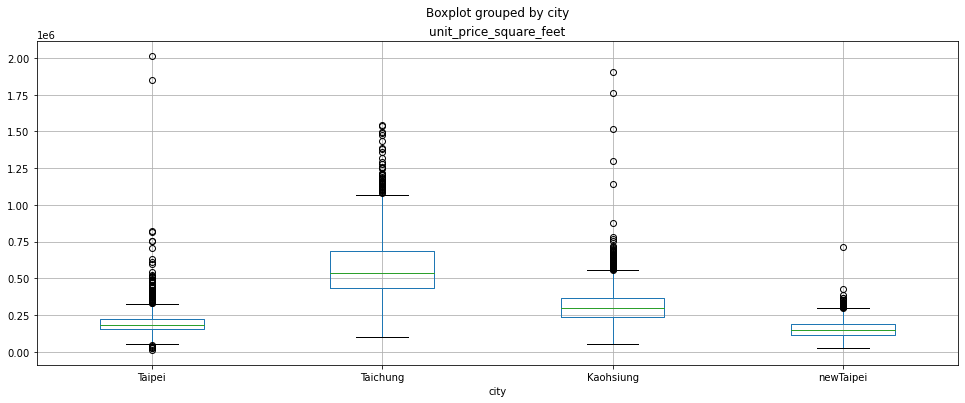

In [39]:
# 5. 資料視覺化並解釋
# 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，
# 並找出單價元坪(unit_price_square_feet)中位數最高的地區
import matplotlib.pyplot as plt
new_data.boxplot(column=['unit_price_square_feet'], by='city', figsize=(16,6))
plt.xticks([1,2,3,4],['Taipei','Taichung','Kaohsiung','newTaipei'])
plt.show()

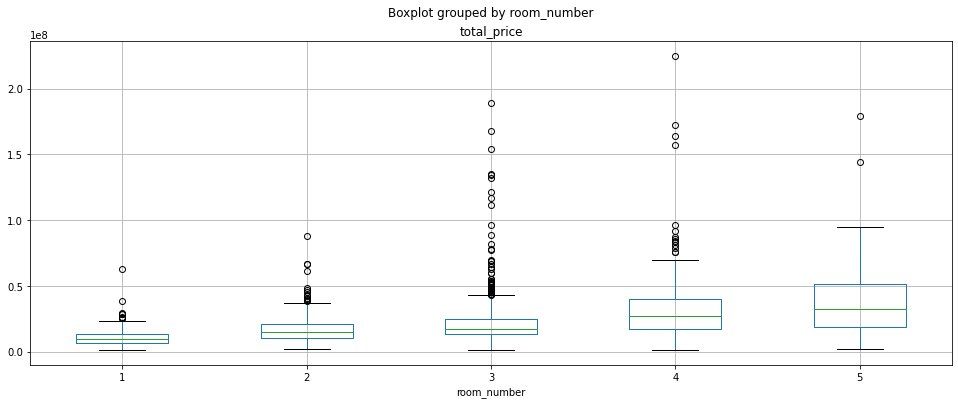

In [40]:
# 5-1. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，
# 並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
new_data.loc[new_data['city']=='台北'].boxplot(column=['total_price'], by='room_number', figsize=(16,6))
plt.show()

0    39
1    39
2    39
3    39
4    39
Name: new_towns, dtype: int32


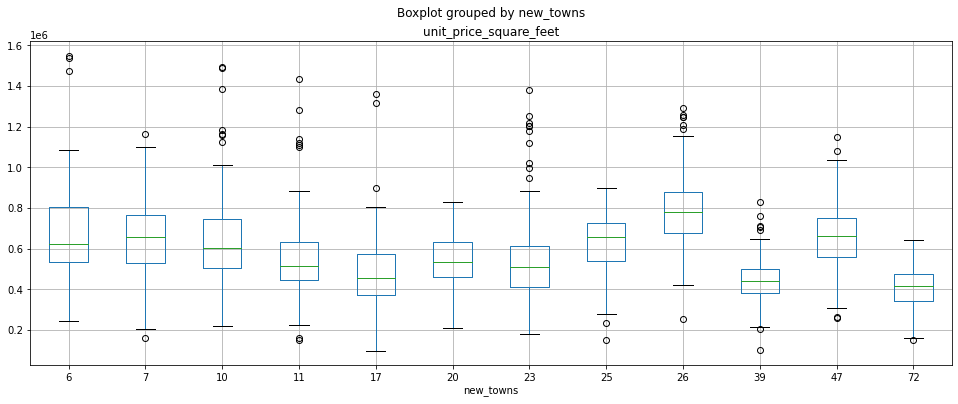

['大安區']


In [41]:
# 5-2. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。
# hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder().fit(new_data['towns'].values)
new_data['new_towns'] = le.transform(new_data['towns'].values)
print(new_data['new_towns'].head())
new_data.loc[new_data['city']=='台北'].boxplot(column=['unit_price_square_feet'], by='new_towns', figsize=(16,6))
plt.show()

#運用.inverse_transform()反查編碼的地區
print(le.inverse_transform([26])) #大安區單價最高

                               total_price  unit_price_square_feet
total_price                       1.000000                0.577494
building_area_square_meter        0.662400               -0.019893
main_building_area                0.608987               -0.001812
unit_price                        0.577494                1.000000
room_number                       0.456589                0.056769
hall_number                       0.341322                0.055753
health_number                     0.447979                0.018283
tx_dt_year                             NaN                     NaN
buildin_area_square_feet          0.662400               -0.019893
main_buildin_area_square_feet     0.608987               -0.001812
unit_price_square_feet            0.577494                1.000000
new_towns                         0.017246                0.081254


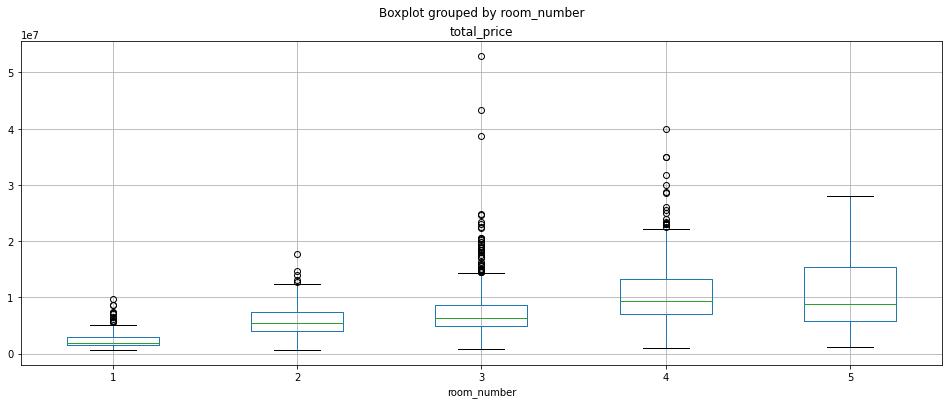

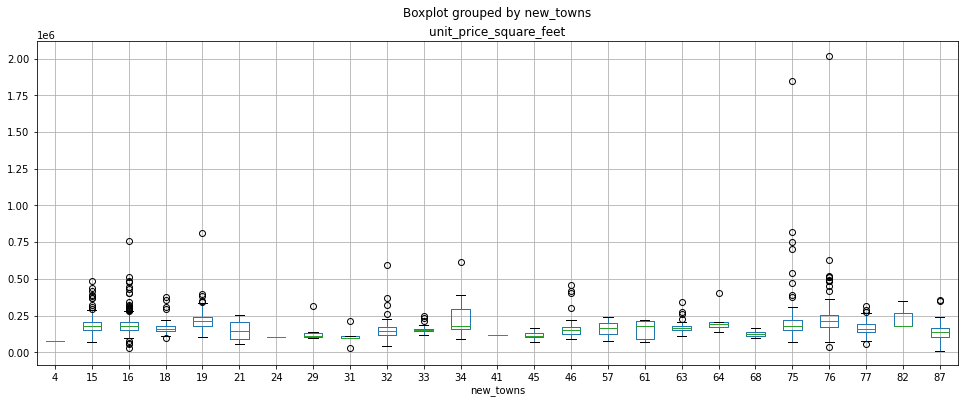

['西屯區']


In [42]:
#台中
new_data2 = new_data.loc[new_data['city']=='台中'].corr()[['total_price','unit_price_square_feet']]
print(new_data2)
new_data.loc[new_data['city']=='台中'].boxplot(column='total_price', by='room_number', figsize=(16,6))
plt.show() # 台中總價四房比五房貴
new_data.loc[new_data['city']=='台中'].boxplot(column='unit_price_square_feet', by='new_towns', figsize=(16,6))
plt.show()
#運用.inverse_transform()反查編碼的地區
print(le.inverse_transform([76])) #西屯區每坪單價最貴